In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df1 = pd.read_csv('fortune500-full.csv')
df1.head(5)

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [3]:
df2 = df1.loc[(df1['Company'] == 'General Motors') | (df1['Company'] == 'Exxon Mobil') | (df1['Company'] == 'General Electric')].copy()
df2.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
3,1955,4,General Electric,2959.1,212.6
500,1956,1,General Motors,12443.3,1189.5
501,1956,2,Exxon Mobil,6272.4,709.3


In [4]:
data = df2.groupby('Year')['Revenue (in millions)'].sum().div(3).copy()
df_av = pd.DataFrame(data.values, columns=['Average'], index=data.index)
df_av.head()

,Average
Year,
1955,6148.000000
1956,7270.366667
1957,7337.766667
1958,7718.566667
1959,7062.133333


In [5]:
df_gm = df2.loc[(df2['Company'] == 'General Motors')].copy()
df_gm['Rolling Average'] = df_gm['Revenue (in millions)'].rolling(5).mean().copy()
df_gm.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions),Rolling Average
0,1955,1,General Motors,9823.5,806,NaN
500,1956,1,General Motors,12443.3,1189.5,NaN
1000,1957,1,General Motors,10796.4,847.4,NaN
1500,1958,1,General Motors,10989.8,843.6,NaN
2000,1959,1,General Motors,9522.0,633.6,10715.0


In [6]:
df_ex = df2.loc[(df2['Company'] == 'Exxon Mobil')].copy()
df_ex['Rolling Average'] = df_ex['Revenue (in millions)'].rolling(5).mean().copy()
df_ex.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions),Rolling Average
23000,2001,1,Exxon Mobil,210392.0,17720,143356.6
23501,2002,2,Exxon Mobil,191581.0,15320,157786.0
24002,2003,3,Exxon Mobil,182466.0,11460,169803.4
24501,2004,2,Exxon Mobil,213199.0,21510,192303.8
25001,2005,2,Exxon Mobil,270772.0,25330,213682.0


In [7]:
df_ge = df2.loc[(df2['Company'] == 'General Electric')].copy()
df_ge['Rolling Average'] = df_ge['Revenue (in millions)'].rolling(5).mean().copy()
df_ge.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions),Rolling Average
23004,2001,5,General Electric,129853.0,12735,102394.2
23505,2002,6,General Electric,125913.0,13684,111741.0
24004,2003,5,General Electric,131698.0,14118,119912.6
24504,2004,5,General Electric,134187.0,15002,126656.2
25004,2005,5,General Electric,152363.0,16593,134802.8


In [8]:
df = df2.merge(df_av, how='inner', left_on ='Year', right_on='Year')
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions),Average
0,1955,1,General Motors,9823.5,806,6148.000000
1,1955,2,Exxon Mobil,5661.4,584.8,6148.000000
2,1955,4,General Electric,2959.1,212.6,6148.000000
3,1956,1,General Motors,12443.3,1189.5,7270.366667
4,1956,2,Exxon Mobil,6272.4,709.3,7270.366667


Revenue comparison with rolling average for each company

Text(0.5, 1.0, 'Revenue comparison')

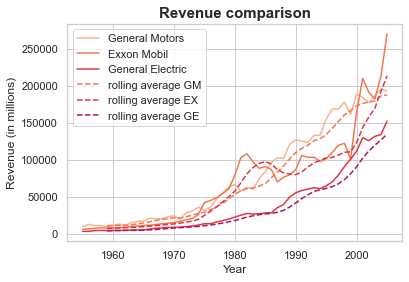

In [14]:
sns.lineplot(data=df, x='Year', y='Revenue (in millions)', hue='Company')
sns.lineplot(data=df_gm, x='Year', y='Rolling Average', label='rolling average GM', linestyle='dashed')
sns.lineplot(data=df_ex, x='Year', y='Rolling Average', label='rolling average EX',linestyle='dashed')
sns.lineplot(data=df_ge, x='Year', y='Rolling Average', label='rolling average GE',linestyle='dashed')
sns.set_theme(style="whitegrid", palette="rocket")
plt.title('Revenue comparison', fontsize=15, fontweight="bold")

Revenue comparison with an overall rolling average 

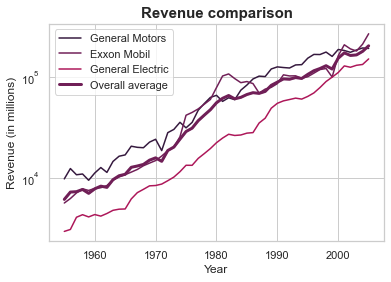

In [10]:
sns.lineplot(data=df, x='Year', y='Revenue (in millions)', hue='Company')
sns.set_theme(style="whitegrid", palette="rocket_r")
sns.lineplot(data=df, x='Year', y='Average', label='Overall average', linewidth = 3)
plt.title('Revenue comparison', fontsize=15, fontweight="bold")
plt.yscale("log")

In [11]:
df['Annual return rate'] = df[['Company', 'Revenue (in millions)']].groupby('Company').pct_change(periods=1)['Revenue (in millions)']
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions),Average,Annual return rate
148,2004,3,General Motors,195645.2,3822,181010.400000,0.047559
149,2004,5,General Electric,134187.0,15002,181010.400000,0.018899
150,2005,2,Exxon Mobil,270772.0,25330,205550.666667,0.270043
151,2005,3,General Motors,193517.0,2805,205550.666667,-0.010878
152,2005,5,General Electric,152363.0,16593,205550.666667,0.135453


Text(0.5, 1.0, 'Annual return rate comparison')

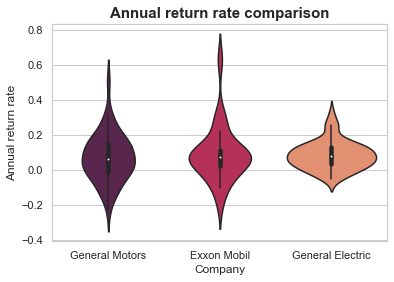

In [12]:
sns.violinplot(data=df, x='Company', y='Annual return rate', palette='rocket')
plt.title('Annual return rate comparison', fontsize=15, fontweight="bold")

Detailed revenue data comparison

Text(0.5, 1.0, 'Detailed revenue data comparison')

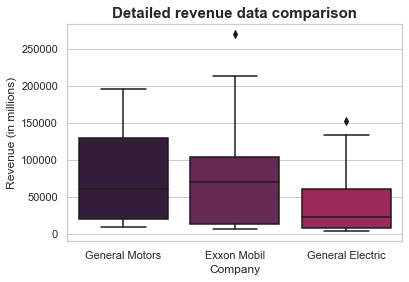

In [15]:
sns.boxplot(data = df, x = 'Company', y = 'Revenue (in millions)')
plt.title('Detailed revenue data comparison', fontsize=15, fontweight='bold')